# 아보카도 가격 예측하기
- 시계열 관련 페이스북 라이브러리 Prophet 이용해보기
- 데이터 출처(카글) : https://www.kaggle.com/neuromusic/avocado-prices
- 프로펫 라이브러리 상세 설명 영상(추후 참고하자) : https://www.youtube.com/watch?v=teD60NOLQL0&list=PLSlDi2AkDv831sk-XATACzvjE7ayqszkk&index=1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
from fbprophet import Prophet

# Load Dataset
2015-01-04 - 2018-03-25

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/시계열(프로펫, LSDM)/forecast_avocado_prices-master/forecast_avocado_prices-master/avocado.csv')

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


해당 날짜에 판매한 양(Volume), 평균판매가(AveragePrice), 크기 별 판매량(4046,4225,4770) 등의 정보가 있음

In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Types

In [6]:
df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


- 종류가 일반, 유기농 이 있음.
- 일반종류(conventoinal) 한해서 분석하기로 함.

# Preprocess

In [7]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')]

df['Date'] = pd.to_datetime(df['Date']) # 타입변경 : string으로 되어 있는것을 Date 타입으로 변경한다

data = df[['Date', 'AveragePrice']].reset_index(drop=True) # 날짜와 가격을 제외한 칼럼을 전부 날린다

data = data.rename(columns={'Date': 'ds', 'AveragePrice': 'y'}) # 칼럼명 변경

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


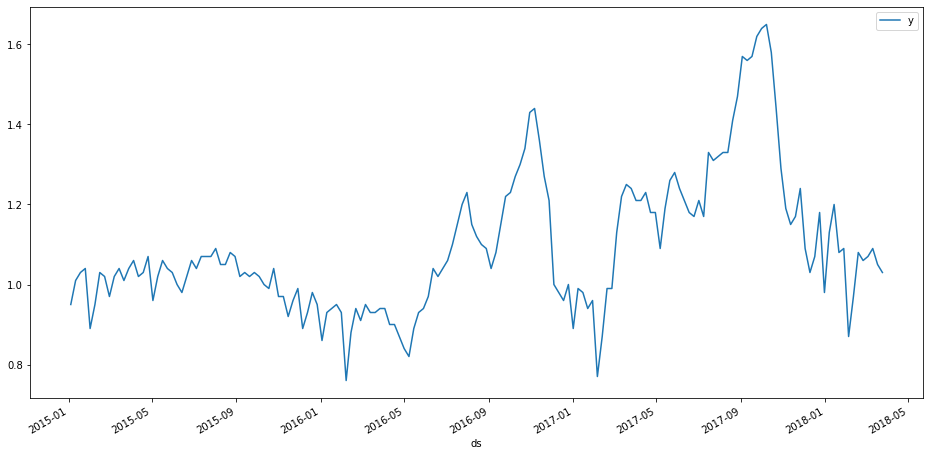

In [8]:
data.plot(x='ds', y='y', figsize=(16, 8))

# Fit

https://facebook.github.io/prophet/docs/quick_start.html

In [9]:
model = Prophet()

model.fit(data) # 이렇게하면 학습끝난거임

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Predict

In [10]:
future = model.make_future_dataframe(periods=365) # 앞으로 365일 기간동안을 예측한다

forecast = model.predict(future) # 데이터프레임 형태로 반환함

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.172470,0.985016,1.234867,1.102743,1.239384,-0.061125,-0.061125,-0.061125,-0.061125,-0.061125,-0.061125,0.0,0.0,0.0,1.111345
530,2019-03-22,1.172358,0.983662,1.236775,1.102274,1.239390,-0.059707,-0.059707,-0.059707,-0.059707,-0.059707,-0.059707,0.0,0.0,0.0,1.112651
531,2019-03-23,1.172246,0.972516,1.239238,1.101805,1.239233,-0.057812,-0.057812,-0.057812,-0.057812,-0.057812,-0.057812,0.0,0.0,0.0,1.114434
532,2019-03-24,1.172133,0.987329,1.239980,1.101241,1.239053,-0.055455,-0.055455,-0.055455,-0.055455,-0.055455,-0.055455,0.0,0.0,0.0,1.116678
533,2019-03-25,1.172021,0.982900,1.242041,1.100593,1.239120,-0.052667,-0.052667,-0.052667,-0.052667,-0.052667,-0.052667,0.0,0.0,0.0,1.119354


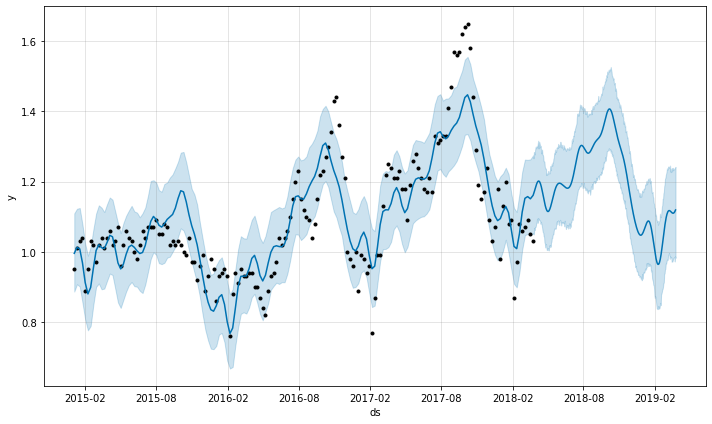

In [11]:
fig1 = model.plot(forecast)

- 검은색 점 : 기존 df의 실제 데이터
- 푸른 선 : 데이터를 통해 분석한 경향선
- 2018-02 이후 : 실제 데이터가 없으므로 검정점은 없고 선만 있음!

# Components
-> 예측에 영향을 준 요소 반환!

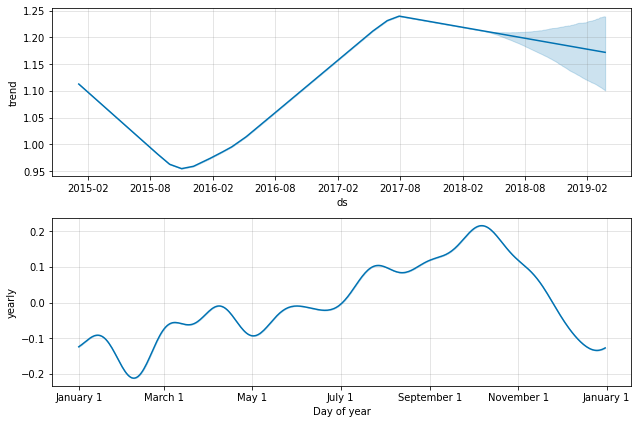

In [12]:
fig2 = model.plot_components(forecast)

1. trend : 전반적인 경향이 이렇더라
2. yearly : 연간분석 결과 1월은 낮고 9월 이후로 갈수록 높은 결과가 있더라